In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

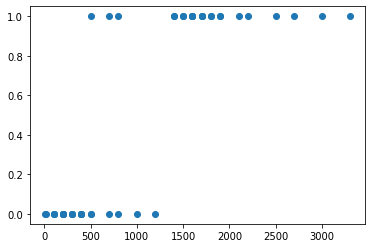

In [7]:
base = pd.read_csv('Eleicao.csv', sep =';')
plt.scatter(base.DESPESAS, base.SITUACAO)
#Importando a base e grafico 

In [8]:
base.describe
#Descrição base

<bound method NDFrame.describe of             CANDIDATO  SITUACAO  DESPESAS
0       George Turner         0        10
1      Victor Johnson         0       100
2         Jerry Perry         1      1600
3        Shirley Cook         1      1500
4      Carolyn Bailey         1      3300
5       Susan Sanders         0       200
6      Anthony Harris         1      1800
7   Philip Richardson         1      1700
8     Eugene Phillips         0       300
9      Mildred Morris         1      1800
10      Richard Jones         0       100
11     Joan Hernandez         0       500
12  Lawrence Mitchell         1      3000
13       Annie Brooks         0        20
14    Stephen Simmons         0       200
15     Samuel Russell         1       700
16        Jason Brown         1      1600
17     Bobby Gonzalez         1      1900
18     Steven Coleman         0       100
19   Benjamin Ramirez         0       400
20      Pamela Bryant         1      2700
21        Billy Perez         0       200


In [9]:
np.corrcoef(base.DESPESAS, base.SITUACAO)
#Analisando coeficiente de correlação

array([[1.        , 0.81218717],
       [0.81218717, 1.        ]])

In [0]:
x = base.iloc[:,2].values
x = x[:, np.newaxis]
y = base.iloc[:,1].values
#Criando o X e Y e a segunda linha comando igual a reshap

In [12]:
modelo = LogisticRegression()
modelo.fit(x,y)
modelo.coef_
modelo.intercept_
#Gerando o modelo e prevendo

array([-4.60287217])

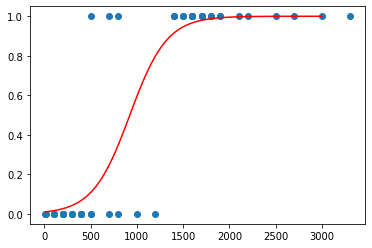

In [19]:
x_teste = np.linspace(10,3000,100)
def model(x):
  return 1/(1+np.exp(-x))

r = model(x_teste * modelo.coef_ + modelo.intercept_).ravel()
plt.scatter(x,y)
plt.plot(x_teste, r, color = 'red')
#o def foi para criar a linha 

In [29]:
base_prev = pd.read_csv('NovosCandidatos.csv', sep = ';')
base_prev.columns
#Importando a base e vendo as colunas

Index(['CANDIDATO', 'DESPESAS'], dtype='object')

In [0]:
despesas = base_prev.iloc[:,1].values
despesas = despesas.reshape(-1,1)
previsoes_teste = modelo.predict(despesas)
#Pegrando a variavel despesas e a prevendo

In [0]:
base_prev = np.column_stack((base_prev, previsoes_teste))
#Criando uma nova coluna e agregando na bsae_prev

In [36]:
base_prev
#imprimindo

array([['A', 0, 0],
       ['B', 10, 0],
       ['C', 200, 0],
       ['D', 500, 0],
       ['E', 900, 0],
       ['F', 1500, 1],
       ['G', 3000, 1]], dtype=object)